<a href="https://colab.research.google.com/github/araujorobert/Time-series-course/blob/main/1.%20Introducci%C3%B3n%20a%20las%20series%20de%20tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importamos librerias**

In [1]:
import numpy as np
import pandas as pd

**Importamos datos**

In [2]:
df = pd.read_csv('Index2018.csv')

In [3]:
df_copy = df.copy()

**Examinamos los datos**

In [5]:
df_copy
# Las columnas de la 2 a la 5 representan 4 precios de cierre de cuatro indices de mercado
# estos indices son { spx, dax, ftse, nikkei }
# spx: bolsa de valores de USA
# dax: bolsa alemana
# ftse: bolsa de londres
# nikkei: bolsa japoneza

# Cuando hablamos de por ejemplo spx500, dax100, etc. el numero que sigue del nombre
# representa el numero de empresas incluidas en la cartera.

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [7]:
# Estadisticos basicos del dataset
df_copy.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
# ¿Hay valores faltantes?
df_copy.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [9]:
# Aparentemente no, pero calculemos la suma para estar seguros
df_copy.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Grafiquemos los datos**

In [10]:
import matplotlib.pyplot as plt

**Graficamos la serie de tiempo spx**

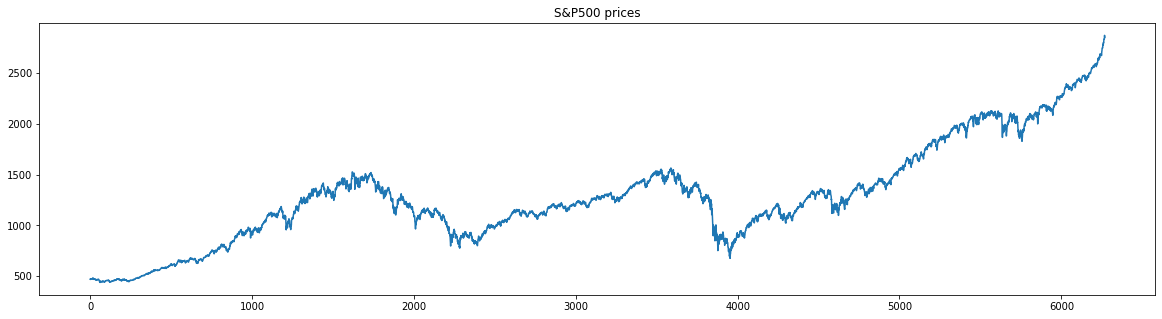

In [11]:
df_copy.spx.plot(figsize=(20,5), title='S&P500 prices')
plt.show()

**Graficamos la serie de tiempo ftse**

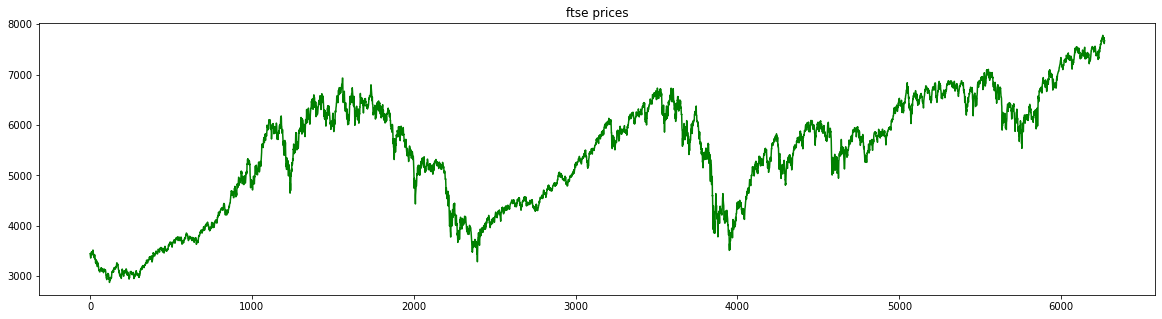

In [12]:
df_copy.ftse.plot(figsize=(20,5), title='ftse prices', color='green')
plt.show()

**Graficamos ambas series juntas**

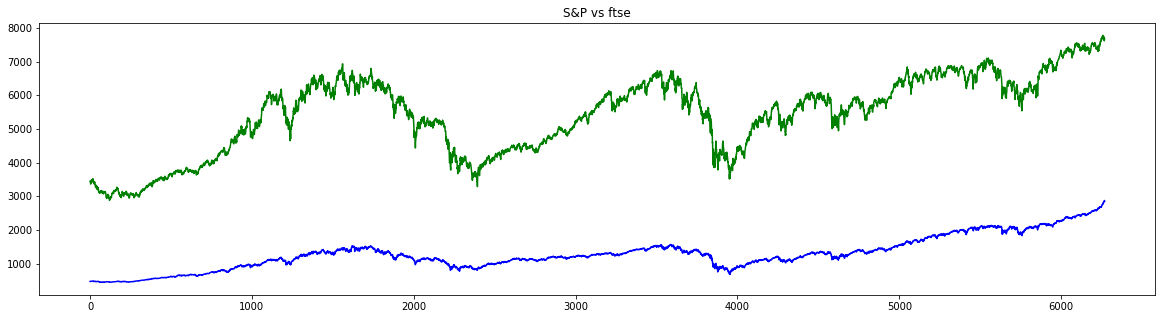

In [13]:
df_copy.spx.plot(figsize=(20,5), color='blue')
df_copy.ftse.plot(figsize=(20,5), color='green')
plt.title('S&P vs ftse')
plt.show()

1. Notamos subidas y bajadas similares en ambas series temporales. Ésto implica que los mercados bursatiles son similares.

2. La serie temporal azul parece ser mas estable pero esto es por efecto de la escala, comprobemoslo calculando el coeficiente de variación.

In [17]:
cv_spx = np.std(df_copy.spx)/np.mean(df_copy.spx)
cv_ftse = np.std(df_copy.ftse)/np.mean(df_copy.ftse)
cv_spx, cv_ftse

(0.3784932522566544, 0.21123761139924846)

Vemos que la variación de la serie temporal azul es incluso mayor que la verde, pero por efectos de escala aparenta ser mas estable.

**The QQ plot**

In [19]:
import scipy.stats 

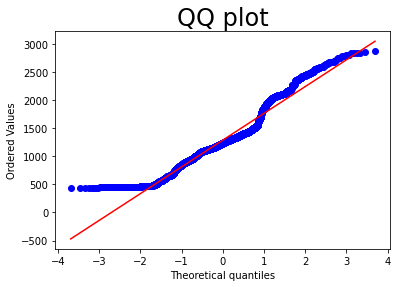

In [20]:
scipy.stats.probplot(df_copy.spx, plot=plt)
plt.title('QQ plot', size=24)
plt.show()

La linea roja representa la distribución normal, y el que los datos no coincidan con ella nos dice que éstos no se distribuyen normalmente.

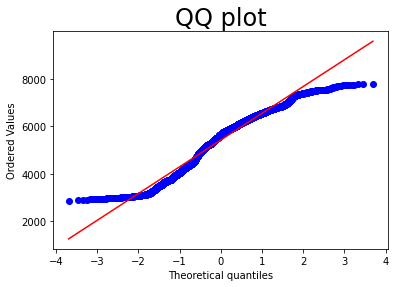

In [21]:
scipy.stats.probplot(df_copy.ftse, plot=plt)
plt.title('QQ plot', size=24)
plt.show()

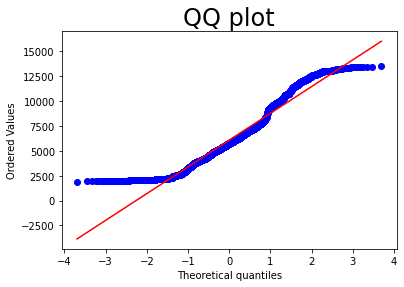

In [22]:
scipy.stats.probplot(df_copy.dax, plot=plt)
plt.title('QQ plot', size=24)
plt.show()

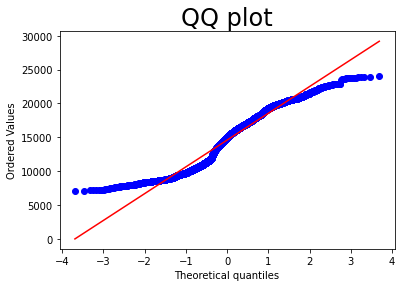

In [23]:
scipy.stats.probplot(df_copy.nikkei, plot=plt)
plt.title('QQ plot', size=24)
plt.show()